## Reading CSV files with NumPy

In this lesson, we'll see how to use NumPy's Boolean indexing to easily select and assign data from and to ndarrays.

Imagine we're working with the dataset of [NYC taxi trips](https://www1.nyc.gov/site/tlc/about/tlc-trip-record-data.page) from the, and we want to answer questions like:

- How many taxi trips were taken in a particular month?
- Which is the busiest airport?
- What are the averages for trip distance, trip length, and total amount for rides under a particular speed?

 We'll use Boolean indexing to help us answer these questions

pickup_year	pickup_month	pickup_day	pickup_dayofweek	pickup_time	pickup_location_code	dropoff_location_code	trip_distance	trip_length	fare_amount	fees_amount	tolls_amount	tip_amount	total_amount	payment_type
2016	1	1	5	0	2	4	21.00	2037	52.00	0.80	5.54	11.65	69.99	1
2016	1	1	5	0	2	1	16.29	1520	45.00	1.30	0.00	8.00	54.30	1
2016	1	1	5	0	2	6	12.70	1462	36.50	1.30	0.00	0.00	37.80	2
2016	1	1	5	0	2	6	8.70	1210	26.00	1.30	0.00	5.46	32.76	1
2016	1	1	5	0	2	6	5.56	759	17.50	1.30	0.00	0.00	18.80	2


First, take a look at the first five rows of our taxi data, along with their column labels:

Here's some info on selected columns:

- 📅 pickup_year: Trip's year
- 📅 pickup_month: Trip's month (January is 1, December is 12)
- 📅 pickup_day: Trip's day of the month
- 📍 pickup_location_code: Starting airport or borough
- 📍 dropoff_location_code: Ending airport or borough
- 📏 trip_distance: Trip distance in miles
- ⏱️ trip_length: Trip length in seconds
- 💵 fare_amount: Base fare in dollars
- 💰 total_amount: Total amount charged, including all fees, tolls, and tips

Check out the [data dictionary](https://s3.amazonaws.com/dq-content/290/nyc_taxi_data_dictionary.md) for details on all columns.

In the previous lesson, we loaded our taxi data as a list of lists using the csv module before converting it to a NumPy ndarray. NumPy contains many helpful functions that make loading data directly into an ndarray much easier. In this lesson, we'll use NumPy's [numpy.genfromtxt() function](https://numpy.org/doc/stable/reference/generated/numpy.genfromtxt.html) to load our taxi data directly into an ndarray.

Here's the simplified syntax for using the numpy.genfromtxt() function to load a text file:

In [29]:
import numpy as np
import csv
np.set_printoptions(suppress=True)

np.genfromtxt(filename, delimiter=None)

- filename: a positional argument; path (usually defined as a string) to the text file.
- delimiter: a named argument; string used to separate each value in the text file. For CSV files, we use a comma – defined as a string – (',') as the delimeter.

To read and load a file named data.csv into an ndarray variable called data, we'd use the following syntax:

data = np.genfromtxt('data.csv', delimiter=',')

Now let's load our nyc_taxis.csv data file directly into a NumPy ndarray!

In [23]:
taxi = np.genfromtxt('../Datasets/nyc_taxis.csv', delimiter=',')

In [24]:
taxi

array([[    nan,     nan,     nan, ...,     nan,     nan,     nan],
       [2016.  ,    1.  ,    1.  , ...,   11.65,   69.99,    1.  ],
       [2016.  ,    1.  ,    1.  , ...,    8.  ,   54.3 ,    1.  ],
       ...,
       [2016.  ,    6.  ,   30.  , ...,    5.  ,   63.34,    1.  ],
       [2016.  ,    6.  ,   30.  , ...,    8.95,   44.75,    1.  ],
       [2016.  ,    6.  ,   30.  , ...,    0.  ,   54.84,    2.  ]])

In [25]:
taxi.shape

(2014, 15)

After inspecting (or printing) the shape of taxi, we found that the taxi dataset has 2014 rows and 15 columns. We also noticed something interesting about the first row of taxi: it's full of something called nan (or NaN) values.

In [26]:
taxi[0]

array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan])

Before diving into what they are and why we got them, let's revisit how we opened the taxi CSV file in the previous lesson, where we didn't encounter any NaN values.

### Opening nyc_taxi.csv as a List of Lists

In [30]:
# open the file and make it a list
f = open("../Datasets/nyc_taxis.csv", "r")
taxi_list = list(csv.reader(f))

# remove the header row
taxi_list = taxi_list[1:]

# convert all values to floats
converted_taxi_list = []
for row in taxi_list:
    converted_row = []
    for item in row:
        converted_row.append(float(item))
    converted_taxi_list.append(converted_row)

# convert the list of lists to an ndarray
taxi = np.array(converted_taxi_list)

When we opened the file this way, we had to explicitly convert all the data to float values because ndarrays can only contain one data type. We didn't need this step in the previous exercise since numpy.genfromtxt() automatically determines the data type by looking at the file's values.

We can use the ndarray.dtype attribute to see the internal data type that NumPy chose when creating our taxi ndarray:

In [31]:
taxi.dtype

dtype('float64')

NumPy determined that the data stored in the CSV file would be best represented using the float64 data type. When it tried to convert the column headers (stored as strings) in the first row into float64 values, it didn't know how to do that so it converted them to NaN values instead.

NaN stands for Not a Number and indicates that the underlying value cannot be represented as a number. It's similar to Python's None constant and it is often used to represent missing values in datasets. In our case, the NaN values appear because the first row of our CSV file contains column names, which NumPy can't convert to float64 values. The solution is simple enough: we need to remove that problematic row!

To remove the header row from our ndarray, we can use a slice, just like with a list of lists:

In [32]:
taxi = np.genfromtxt('../Datasets/nyc_taxis.csv', delimiter=',')

In [33]:
taxi

array([[    nan,     nan,     nan, ...,     nan,     nan,     nan],
       [2016.  ,    1.  ,    1.  , ...,   11.65,   69.99,    1.  ],
       [2016.  ,    1.  ,    1.  , ...,    8.  ,   54.3 ,    1.  ],
       ...,
       [2016.  ,    6.  ,   30.  , ...,    5.  ,   63.34,    1.  ],
       [2016.  ,    6.  ,   30.  , ...,    8.95,   44.75,    1.  ],
       [2016.  ,    6.  ,   30.  , ...,    0.  ,   54.84,    2.  ]])

In [34]:
taxi[1:]

array([[2016.  ,    1.  ,    1.  , ...,   11.65,   69.99,    1.  ],
       [2016.  ,    1.  ,    1.  , ...,    8.  ,   54.3 ,    1.  ],
       [2016.  ,    1.  ,    1.  , ...,    0.  ,   37.8 ,    2.  ],
       ...,
       [2016.  ,    6.  ,   30.  , ...,    5.  ,   63.34,    1.  ],
       [2016.  ,    6.  ,   30.  , ...,    8.95,   44.75,    1.  ],
       [2016.  ,    6.  ,   30.  , ...,    0.  ,   54.84,    2.  ]])

Alternatively, we can avoid getting NaN values by skipping the header row(s) when loading the data. We do this by passing an additional argument, skip_header=1, to our call to the numpy.genfromtxt() function. The skip_header argument accepts an integer — the number of rows from the start of the file to skip. Remember that this integer measures the total number of rows to skip and doesn't use index values. To skip the first row, use a value of 1, not 0.

In [36]:
taxi = np.genfromtxt('../Datasets/nyc_taxis.csv', delimiter=',', skip_header=1)

In [37]:
taxi

array([[2016.  ,    1.  ,    1.  , ...,   11.65,   69.99,    1.  ],
       [2016.  ,    1.  ,    1.  , ...,    8.  ,   54.3 ,    1.  ],
       [2016.  ,    1.  ,    1.  , ...,    0.  ,   37.8 ,    2.  ],
       ...,
       [2016.  ,    6.  ,   30.  , ...,    5.  ,   63.34,    1.  ],
       [2016.  ,    6.  ,   30.  , ...,    8.95,   44.75,    1.  ],
       [2016.  ,    6.  ,   30.  , ...,    0.  ,   54.84,    2.  ]])

## Boolean Arrays

Now, let's dive into one of the most powerful techniques for working with NumPy arrays: using Boolean arrays. A Boolean array is an array filled with Boolean values. We might also call them Boolean vectors or Boolean masks.

Remember, the Boolean (or bool) type is a built-in Python type that can have one of two unique values:

- True
- False

We often create Boolean arrays with Python comparison operators. The comparison operators in Python are:

== — equal to
> — greater than
>= — greater than or equal to
< — less than
<= — less than or equal to
!= — not equal to

Boolean comparisons are expressions that evaluate to either True or False in Python. These expressions typically involve comparing two values using comparison operators. Here are a few simple examples using comparison operators:

In [38]:
print(5 > 6)

False


In [39]:
False

False

In [40]:
print(type(3.5) == float)

True


In [41]:
print(len('Sunday') <= 9)

True


To understand what happens during a vectorized Boolean operation, let's look at an example of what happens during a vectorized mathematical operation between an ndarray and a single numeric value:

In [42]:
print(np.array([2, 4, 6, 8]) +  10)

[12 14 16 18]


The + 10 operation applied to each value in the array.

Now, let's look at what happens when we perform a vectorized Boolean operation between an ndarray and a single value:

In [43]:
np.array([2, 4, 6, 8]) < 5

array([ True,  True, False, False])

A similar pattern occurs – each value in the array is compared to 5. If the value is less than 5, True is returned. Otherwise, False is returned.

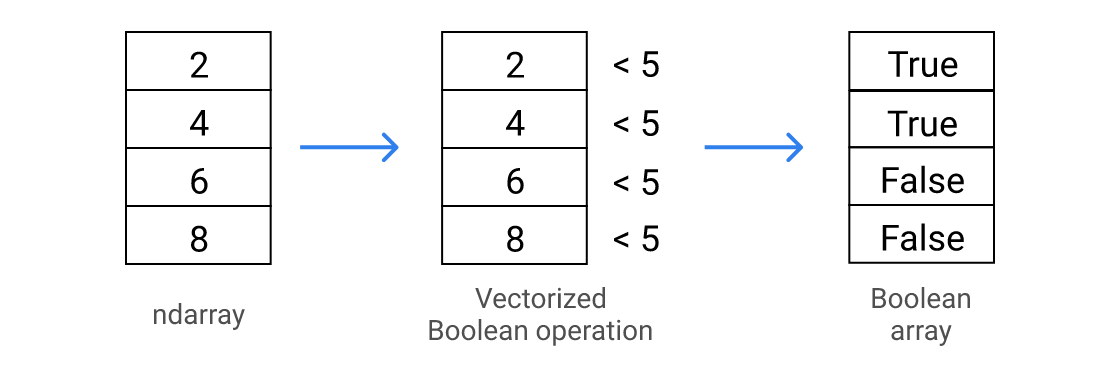

In [44]:
a = np.array([1, 2, 3, 4, 5])
b = np.array(["blue", "blue", "red", "blue"])
c = np.array([80.0, 103.4, 96.9, 200.3])

In [45]:
b

array(['blue', 'blue', 'red', 'blue'], dtype='<U4')

In [46]:
a < 3

array([ True,  True, False, False, False])

In [47]:
b == 'blue'

array([ True,  True, False,  True])

In [48]:
c > 100

array([False,  True, False,  True])

## Boolean Indexing with 1D ndarrays

We just saw how to create Boolean arrays using vectorized Boolean operations. Now, we'll dive into indexing with Boolean arrays, also known as Boolean indexing. Let's have some fun by exploring what happens when we use one of our Boolean arrays from the previous exercise to index an array:

In [50]:
c = np.array([80.0, 103.4, 96.9, 200.3])
c

array([ 80. , 103.4,  96.9, 200.3])

In [51]:
c > 100

array([False,  True, False,  True])

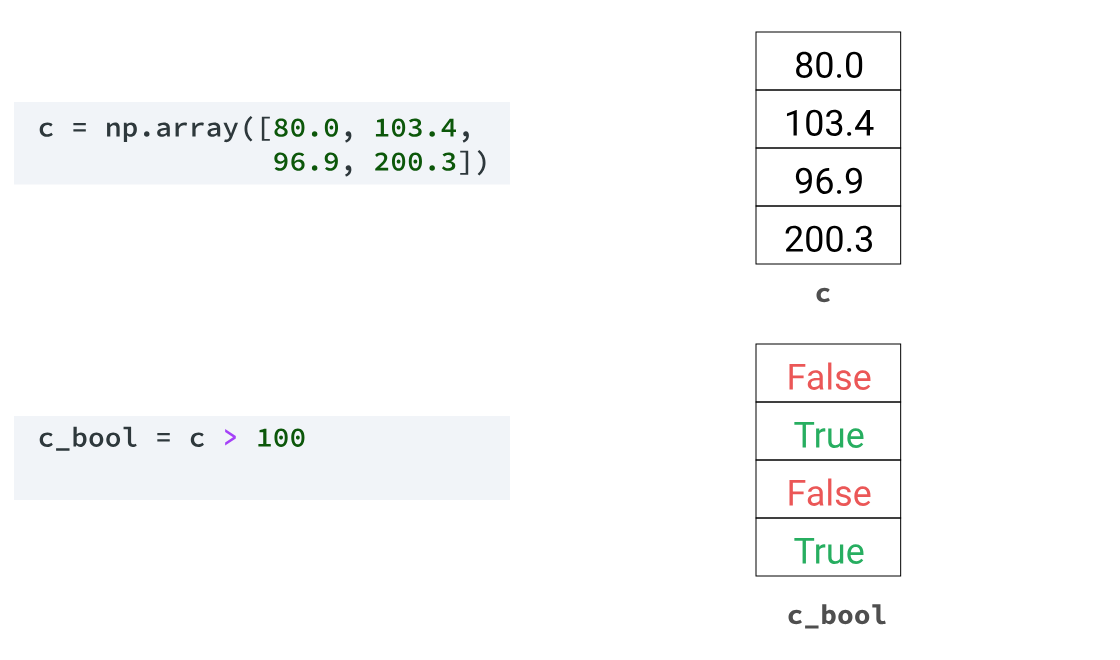

To use Boolean indexing, simply insert the Boolean array into the square brackets like we would with other selection techniques:

In [52]:
c_bool = c > 100

In [53]:
c[c_bool]

array([103.4, 200.3])

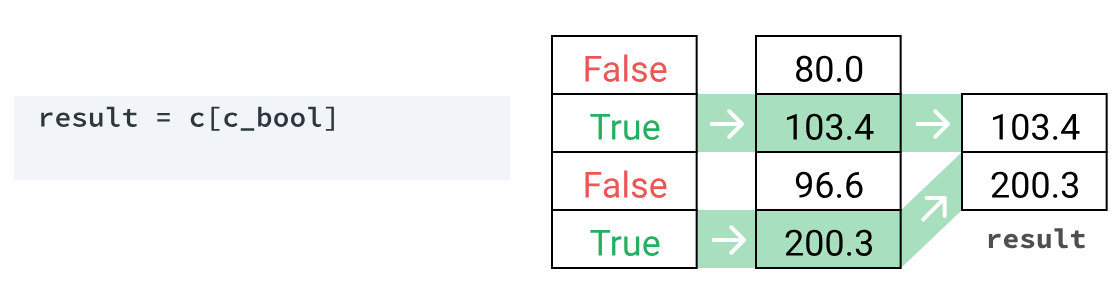

Think of the Boolean array as a filter: True values make the cut, while False values are left behind.

Let's work through an example together to `find out how many taxi rides took place in January` using Boolean indexing. Here's a step-by-step breakdown of how we would do that:

In [54]:
taxi[0]

array([2016.  ,    1.  ,    1.  ,    5.  ,    0.  ,    2.  ,    4.  ,
         21.  , 2037.  ,   52.  ,    0.8 ,    5.54,   11.65,   69.99,
          1.  ])

- Select the pickup_month column (second column) from the ndarray:

In [55]:
pickup_month = taxi[:, 1]
pickup_month

array([1., 1., 1., ..., 6., 6., 6.])

- Create a Boolean array for January (1):

In [57]:
january_bool = pickup_month == 1

In [58]:
january_bool

array([ True,  True,  True, ..., False, False, False])

- Filter pickup_month using the january_bool Boolean array:

In [60]:
january = pickup_month[january_bool]

- Determine the number of January taxi rides using the .shape attribute:

In [64]:
january.shape[0]

800

Voilà! We know there are 800 January taxi rides in our dataset.

## Boolean Indexing with 2D Ndarrays

When working with 2D ndarrays, we can combine Boolean indexing with other indexing methods for even more powerful data selection. Just remember that the Boolean array must have the same length as the dimension we're indexing. Let's check out some examples to see things in action:

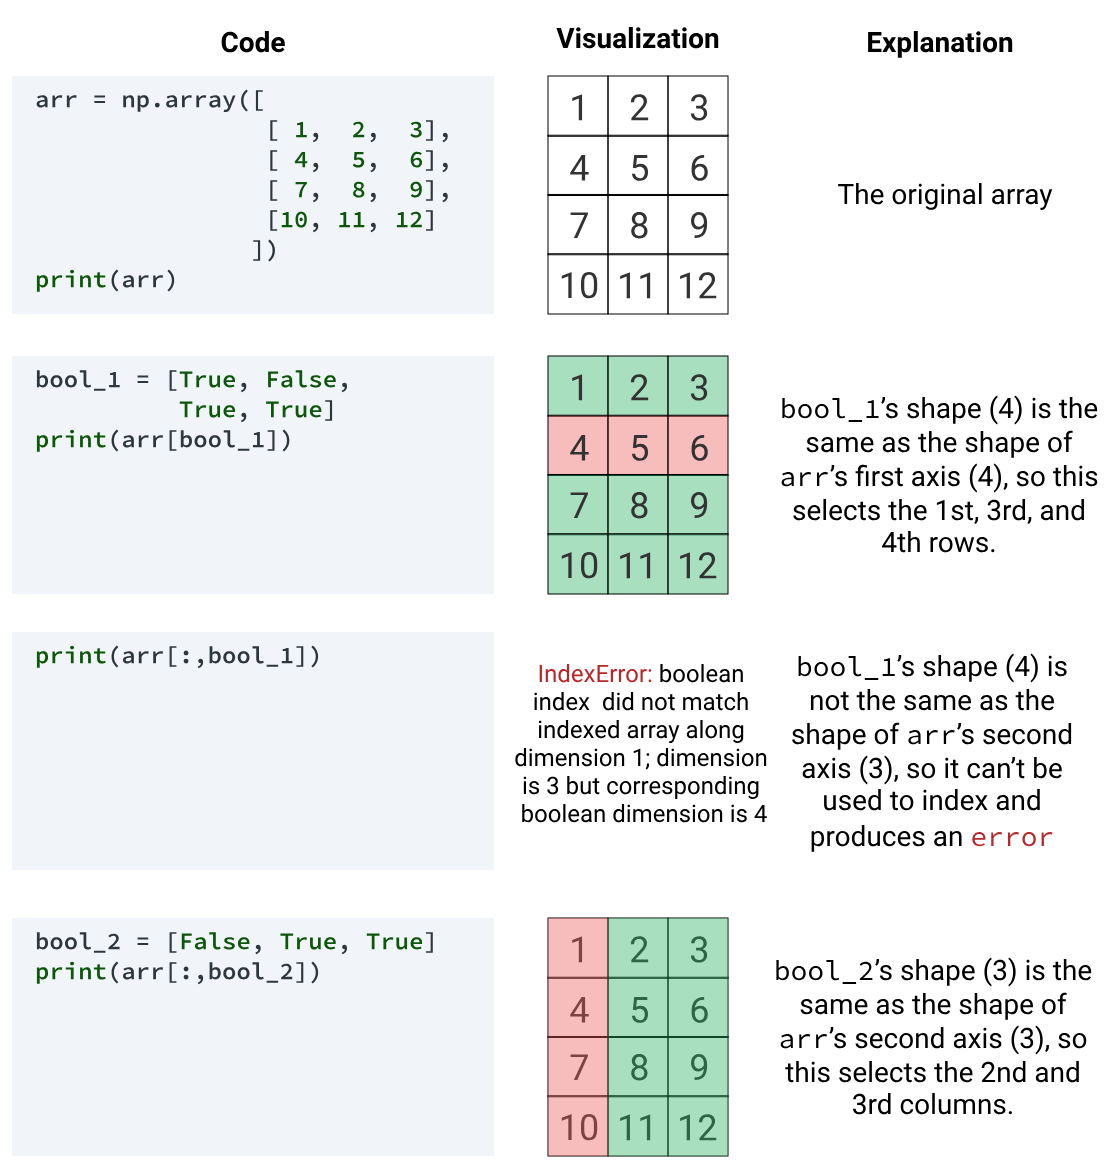

Since a Boolean array doesn't store information about its origin, we can use it to index the entire array, even if it's created from just one column.

Now, let's examine the average speed of taxi trips and see if we can spot any data inconsistencies. We'll calculate the average travel speed like this:

In [65]:
trip_mph = taxi[:, 7] / (taxi[:, 8] / 3600)

Next, we'll scrutinize the dataset for trips exhibiting extreme speeds. Specifically, we will focus on those with an average speed exceeding 20,000 mph. Such a high speed is indeed extraordinary and should be considered as an outlier in our dataset.

In [66]:
# Create a boolean array for trips with average
# speeds greater than 20,000 mph
trip_mph_bool = trip_mph > 20000

In [70]:
# Use the boolean array to select the rows for
# those trips, and the pickup_location_code,
# dropoff_location_code, trip_distance, and
# trip_length columns
trips_over_20000_mph = taxi[trip_mph_bool, 5:9]

print(trips_over_20000_mph)

[[ 2.   2.  23.   1. ]
 [ 2.   2.  19.6  1. ]
 [ 2.   2.  16.7  2. ]
 [ 3.   3.  17.8  2. ]
 [ 2.   2.  17.2  2. ]
 [ 3.   3.  16.9  3. ]
 [ 2.   2.  27.1  4. ]]


A quick glance at the last column (column index 8) reveals that most of these trips are very short rides — all have trip_length values of 4 seconds or fewer. However, this doesn't match the trip distances (column index 7), which are all more than 16 miles.

Let's continue our investigation by using this technique to analyze the rows with the highest values in the tip_amount column.

In [74]:
tip_amount = taxi[:, 12]

tip_bool = tip_amount > 20

taxi[tip_bool, 5:14]

array([[   4.  ,    2.  ,   21.45, 2004.  ,   52.  ,    0.8 ,    0.  ,
          52.8 ,  105.6 ],
       [   3.  ,    3.  ,    5.4 ,   74.  ,   80.  ,    0.3 ,    0.  ,
          24.05,  104.35],
       [   4.  ,    3.  ,    8.55,  832.  ,   23.5 ,    0.8 ,    0.  ,
          25.  ,   49.3 ],
       [   4.  ,    2.  ,   16.5 , 4340.  ,   52.  ,    0.8 ,    5.54,
          21.  ,   79.34]])

## Assigning Values in Ndarrays

So far, we've only practiced retrieving data from ndarrays. What if we want to modify the data, not just retrieve it; how do we do that? As luck would have it, we can assign values to ndarrays using indexing techniques we've already learned! Here's the syntax (in pseudocode) to keep in mind:

ndarray[location_of_values] = new_value

Let's see this in action with a 1D array. We can change a value at a specific index location:



In [75]:
a = np.array(['red', 'blue', 'black', 'blue', 'purple'])

In [76]:
a

array(['red', 'blue', 'black', 'blue', 'purple'], dtype='<U6')

In [78]:
a[0] = 'orange'

In [79]:
a

array(['orange', 'blue', 'black', 'blue', 'purple'], dtype='<U6')

We can also update multiple values at once:

In [80]:
a[3:] = 'pink'
print(a)

['orange' 'blue' 'black' 'pink' 'pink']


Now, let's try with a 2D ndarray. Just like with a 1D ndarray, we can change a specific index location:

In [81]:
ones = np.array([[1, 1, 1, 1, 1],
                 [1, 1, 1, 1, 1],
                 [1, 1, 1, 1, 1]])
ones[1, 2] = 99
print(ones)

[[ 1  1  1  1  1]
 [ 1  1 99  1  1]
 [ 1  1  1  1  1]]


We can also update an entire row...

In [82]:
ones[0] = 42
ones

array([[42, 42, 42, 42, 42],
       [ 1,  1, 99,  1,  1],
       [ 1,  1,  1,  1,  1]])

...or an entire column:

In [83]:
ones[:, 2] = 0
ones

array([[42, 42,  0, 42, 42],
       [ 1,  1,  0,  1,  1],
       [ 1,  1,  0,  1,  1]])

In [84]:
taxi_copy = taxi.copy()

Fix the error: it looks like there's an error in our taxi_copy data. The value at column index 5 (pickup_location) of row index 1066 is incorrect. Use assignment to change this value to 1 in the taxi_copy ndarray.

In [86]:
taxi_copy[1066, 5] = 1

In [87]:
taxi_copy[1066, 5]

1.0

Format the year: the first column (index 0) contains year values as four-digit numbers in the format YYYY. Since all trips in our dataset are from 2016, this entire column is filled with 2016. Use your ndarray modification powers to update these values to the YY format (16) in the taxi_copy ndarray.

In [90]:
taxi_copy[:, 0] = 16
taxi_copy[:, 0]

array([16., 16., 16., ..., 16., 16., 16.])

Replace values with the mean: the values at column index 7 (trip_distance) of rows index 550 and 551 are incorrect. Use assignment and the ndarray.mean() method to change these two values in the taxi_copy ndarray to be the mean value for that column.

In [92]:
taxi_copy[550:552, 7] = taxi_copy[:, 7].mean()

In [93]:
taxi_copy[550:552, 7]

array([12.92477894, 12.92477894])

## Assignment Using Boolean Arrays

We just saw how we can use standard indexing and slicing to assign values to our ndarrays. But wait, there's more! We can also use Boolean arrays for assigning values. Boolean arrays reveal their true potential when used for assignment. Let's dive into an example that showcases their potential:

In [94]:
a2 = np.array([1, 2, 3, 4, 5])


In [95]:
a2_bool = a2 > 2
a2_bool

array([False, False,  True,  True,  True])

In [97]:
a2[a2_bool] = 99

In [98]:
a2

array([ 1,  2, 99, 99, 99])

The Boolean array a2_bool acts like a filter, controlling which values are affected by the assignment operation. The other values remain unchanged, untouched by the transformation. Let's unravel how this code works:

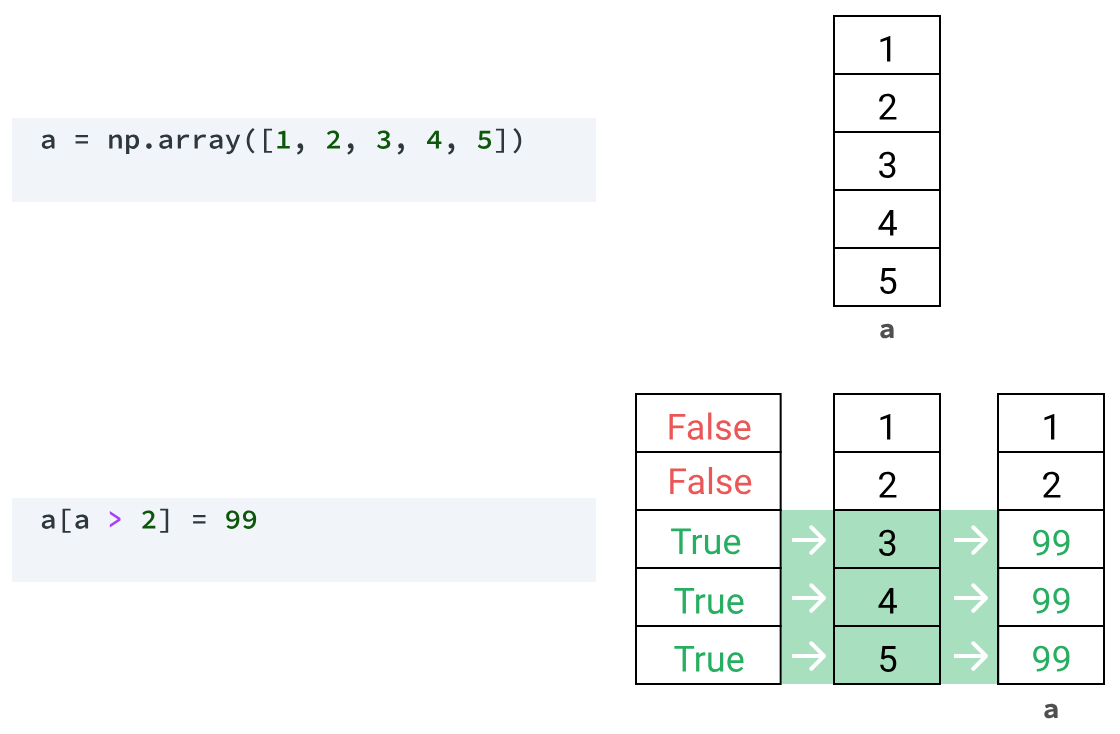

You may notice in the diagram above that we took a "shortcut" – we inserted the definition of the Boolean array directly into the selection. This "shortcut" is the typical way to implement Boolean indexing. Although we've been assigning to an intermediate variable so far to make the process crystal clear, from now on, we'll embrace this more efficient and conventional method.

Our task is find all the trips that took less than a minute and assign them a new trip length of 0 seconds.

In [109]:
taxi_copy[taxi_copy[:, 8] < 60] = 0

Now that we have a handle on 1D Boolean arrays, let's dive into the exciting world of 2D Boolean arrays! We'll start by exploring an example together:

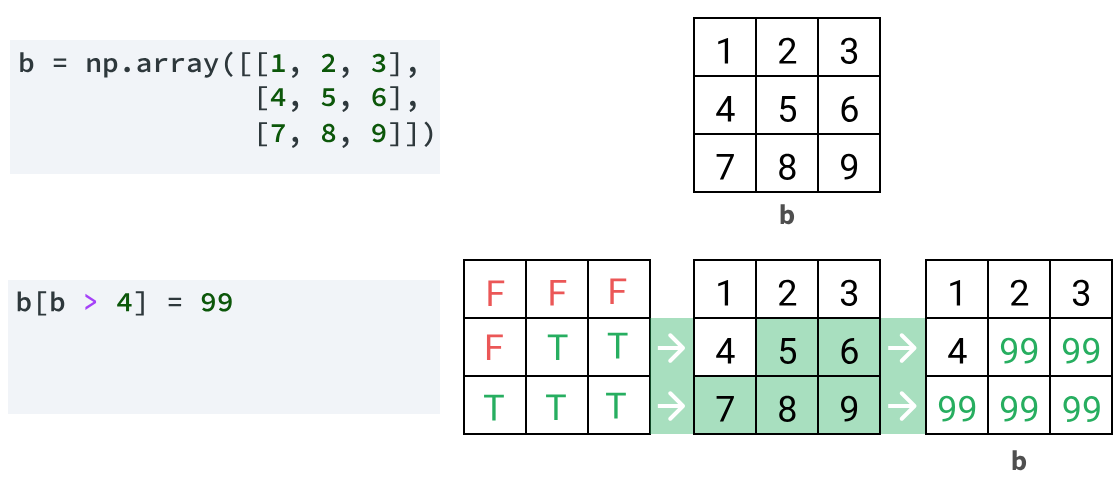

The b > 4 Boolean operation above generates a 2D Boolean array, which then determines the values the assignment affects.

But wait, there's more! We can also use a 1D Boolean array to modify a 2D array:



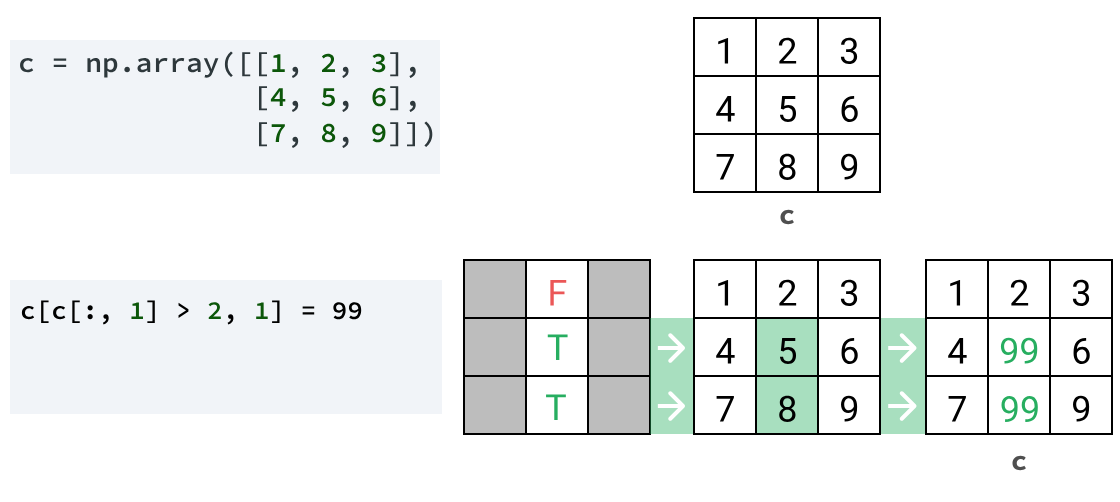

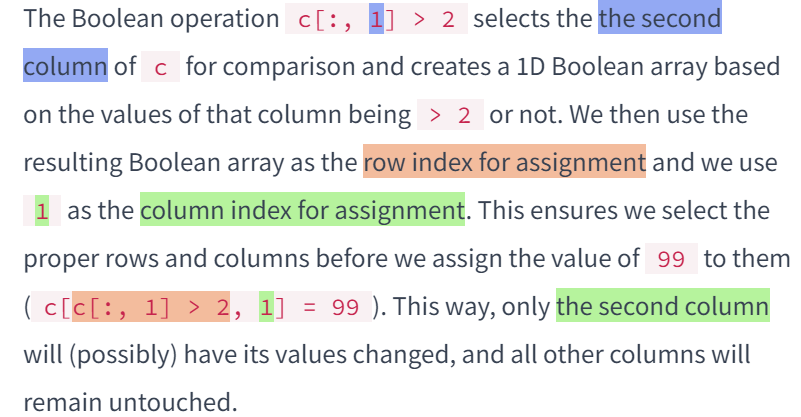

Let's break down the pseudocode syntax for this technique. First, using an intermediate Boolean array variable called row_idx_for_assignment:

In [ ]:
row_idx_for_assignment = array[:, col_idx_for_comparison] == value_for_comparison
array[row_idx_for_assignment, col_idx_for_assignment] = new_value

And then, putting it all in one line:

In [ ]:
array[array[:, col_idx_for_comparison] == value_for_comparison, col_idx_for_assignment] = new_value

While it can feel like a lot to take in at first, just remember that this syntax still follows the same pattern of array[row_index, col_index] = new_value that we've been practicing over the last couple of screens. It's just that now we've upgraded row_index with a Boolean array (array[:, col_idx_for_comparison] == value_for_comparison) to help us make more intricate row selections than we could by using a single index or a slice.

In the exercise below, we're going to use Boolean indexing to assign values to a new column (index 15). This column will indicate if the trip ended at an airport or not. We have already created the new column (zeros) filled with 0 using the numpy.zeros() function and added to the taxi data to create a new dataset called taxi_modified.

In [116]:
taxi_copy = taxi.copy()

In [129]:
# create a new array filled with `0`
zeros = np.zeros((taxi.shape[0], 1))
zeros

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]])

In [130]:
# append the array to the taxi data to create a new column
taxi_modified = np.concatenate((taxi, zeros), axis=1)
taxi_modified

array([[2016.  ,    1.  ,    1.  , ...,   69.99,    1.  ,    0.  ],
       [2016.  ,    1.  ,    1.  , ...,   54.3 ,    1.  ,    0.  ],
       [2016.  ,    1.  ,    1.  , ...,   37.8 ,    2.  ,    0.  ],
       ...,
       [2016.  ,    6.  ,   30.  , ...,   63.34,    1.  ,    0.  ],
       [2016.  ,    6.  ,   30.  , ...,   44.75,    1.  ,    0.  ],
       [2016.  ,    6.  ,   30.  , ...,   54.84,    2.  ,    0.  ]])

In [136]:
taxi_modified[taxi_modified[:, 6] == 2, 15] = 1
taxi_modified[taxi_modified[:, 6] == 3, 15] = 1
taxi_modified[taxi_modified[:, 6] == 5, 15] = 1

## Challenge: Which Is the Busiest Airport?

We want to find out which airport in our dataset is the busiest in terms of pickup location.

We'll use Boolean indexing to create three filtered arrays and then compare the number of rows in each array. 

Let's determine the busiest airport by checking the pickup_location_code column (column index 5) for these specific values:

 - 2 = JFK Airport
 - 3 = LaGuardia Airport
- 5 = Newark Airport

Find the number of trips with JFK Airport as the pickup location:

In [142]:
taxi[taxi[:, 5] == 2].shape[0]

724

In [143]:
taxi[taxi[:, 5] == 3].shape[0]

755

In [144]:
taxi[taxi[:, 5] == 5].shape[0]

0

## Challenge: Calculating Statistics for Trips on Clean Data

Now, let's tackle our second and final challenge, which focuses on removing potentially "dirty data" from our dataset, and calculating some descriptive statistics on the remaining "clean data."

First, you'll use Boolean indexing to filter out any rows with an average trip speed greater than 100 mph (160 kph), ensuring that you remove any data that might be questionable.

In [145]:
trip_mph = taxi[:, 7] / (taxi[:, 8] /3600)

In [146]:
cleaned_taxi = taxi[trip_mph < 100]

In [147]:
mean_distance = cleaned_taxi[:, 7].mean()
mean_distance

12.902684630738525

In [148]:
mean_length = cleaned_taxi[:, 8].mean()
mean_length

2271.691117764471

In [150]:
mean_total_amount = cleaned_taxi[:, 13].mean()
mean_total_amount

48.70217065868263

In this lesson, we explored some powerful techniques to work with ndarrays, in particular we:
- Learned how to use numpy.genfromtxt() to load data into an ndarray.
- Discussed NaN values and how they can affect our data.
- Discovered Boolean arrays and how to create them using comparison operators.
- Learned to use Boolean indexing to filter values in both one- and two-dimensional ndarrays.
- Practiced assigning new values to an ndarray based on their locations.
- Gained experience in assigning new values to an ndarray based on their values, using Boolean indexing.